## Business requirements
Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 
## Task 1
please find the 3 datasets attached from Sprocket Central Pty Ltd: 
<br />
1) *Customer Demographic* <br />
2) *Customer Addresses*  <br/>
3) *Transaction data in the past three months*  
<br />
Can you please review the data quality to ensure that it is ready for our analysis in phase two. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.


“Hi there – Welcome again to the team! The client has asked our team to assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues.  Can you please take a look at the datasets we’ve received and draft an email to them identifying the data quality issues and how this may impact our analysis going forward?

I will send through an example of a typical data quality framework that can be used as a guide. Remember to consider the join keys between the tables too. Thanks again for your help.”

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import matplotlib

In [2]:
excelFile = pd.ExcelFile("kpmg.xlsx") 

In [3]:
Transactions = pd.read_excel(excelFile, 'Transactions', skiprows=[0]) 
CustomerDemographic = pd.read_excel(excelFile,'CustomerDemographic', skiprows=[0]) 
CustomerAddress = pd.read_excel(excelFile, 'CustomerAddress', skiprows=[0]) 
pd.set_option("display.max_columns",100) 
pd.set_option("display.max_rows",None) 

In [4]:
Transactions.columns 

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [5]:
Transactions = Transactions.iloc[:,0:13] 
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [6]:
CustomerDemographic = CustomerDemographic.iloc[:,0:13] 
CustomerAddress.columns 

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [7]:
CustomerAddress = CustomerAddress.iloc[:,0:6]  
CustomerAddress.head(0) 

,customer_id,address,postcode,state,country,property_valuation


In [8]:
data = pd.merge(CustomerDemographic,CustomerAddress, on="customer_id")  
data = pd.merge(Transactions,data, on="customer_id") 
data.to_csv("customerData.csv") 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 19967
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  float64       
 5   order_status                         19968 non-null  object        
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

In [10]:
# checking what type of values do each of the columns in the dataset take
print(" Size of the data set",data.shape,"\n\n","Number of Unique values per column \n")
for column in data.columns:
    print("\n")
    if(data[column].unique().shape[0] ==1 ):
        print("column " ,column, " has zero variance")
    elif(data[column].unique().shape[0] > 1 and data[column].unique().shape[0] < 100):
        print(column," : ",data[column].unique().shape[0])
        print(data[column].unique())
    else:
        print("column " ,column, " has high variance")

 Size of the data set (19968, 30) 

 Number of Unique values per column 



column  transaction_id  has high variance


column  product_id  has high variance


column  customer_id  has high variance


column  transaction_date  has high variance


online_order  :  3
[ 0.  1. nan]


order_status  :  2
['Approved' 'Cancelled']


brand  :  7
['Solex' 'Giant Bicycles' 'Trek Bicycles' 'WeareA2B' 'OHM Cycles'
 'Norco Bicycles' nan]


product_line  :  5
['Standard' 'Road' 'Touring' 'Mountain' nan]


product_class  :  4
['medium' 'high' 'low' nan]


product_size  :  4
['medium' 'large' 'small' nan]


column  list_price  has high variance


column  standard_cost  has high variance


column  product_first_sold_date  has high variance


column  first_name  has high variance


column  last_name  has high variance


gender  :  6
['Male' 'Female' 'U' 'F' 'M' 'Femal']


column  past_3_years_bike_related_purchases  has high variance


column  DOB  has high variance


column  job_title  has high varianc

In [11]:
for column in Transactions:
    num_missing = Transactions[column].isnull().sum()  
    if(num_missing > 0):
        print(column," : ",num_missing)

online_order  :  360
brand  :  197
product_line  :  197
product_class  :  197
product_size  :  197
standard_cost  :  197
product_first_sold_date  :  197


In [12]:
#  missing values per column
for column in data:
    num_missing = data[column].isnull().sum()
    if(num_missing > 0):
        print(column," : ",num_missing)

online_order  :  359
brand  :  195
product_line  :  195
product_class  :  195
product_size  :  195
standard_cost  :  195
product_first_sold_date  :  195
last_name  :  642
DOB  :  446
job_title  :  2379
job_industry_category  :  3222
default  :  1451
tenure  :  446


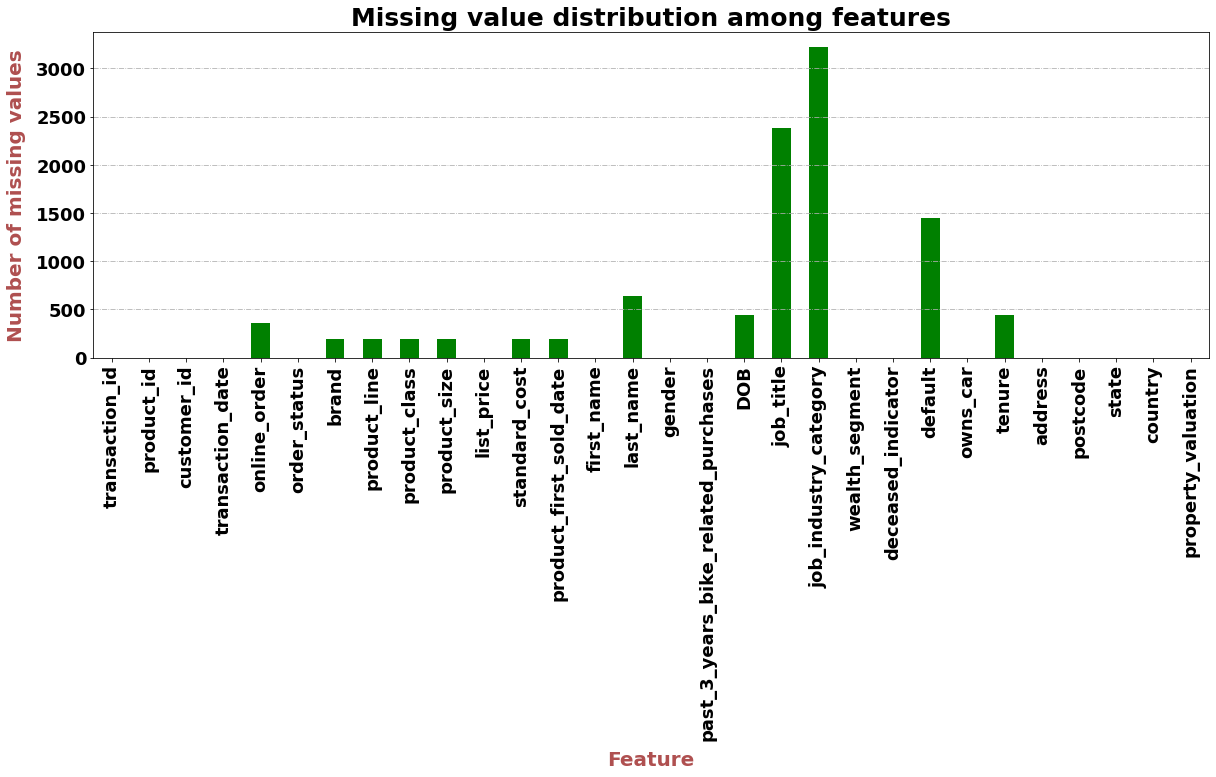

In [13]:
#sns.set_context('talk')
plt.title('Missing value distribution among features', fontsize=25, weight = 'bold')
plt.xlabel('Feature', color='#AF5050', labelpad=10, fontsize=20, weight = 'bold') 
plt.ylabel('Number of missing values', color='#af5050', labelpad=10, fontsize=20, weight = 'bold')
plt.rcParams['axes.axisbelow'] = True
data.isnull().sum().plot(figsize=(20, 6), color='green', rot=90,kind ='bar')
plt.xticks(fontsize=18, rotation=90,weight = 'bold')
plt.yticks(fontsize=18, weight = 'bold')
matplotlib.pyplot.grid(axis = 'y', linestyle='-.') 

In [14]:
data.dtypes

transaction_id                                  int64
product_id                                      int64
customer_id                                     int64
transaction_date                       datetime64[ns]
online_order                                  float64
order_status                                   object
brand                                          object
product_line                                   object
product_class                                  object
product_size                                   object
list_price                                    float64
standard_cost                                 float64
product_first_sold_date                       float64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                   

In [15]:
# checking the maximum and minimum values of numerical columns looking for possible outliers
for column in list(data.select_dtypes(include = ["int64","float64"]).columns):
    maximum = max(data[column])
    minimum = min(data[column])
    print(column, "         max =",maximum, "         min =",minimum)

transaction_id          max = 20000          min = 1
product_id          max = 100          min = 0
customer_id          max = 3500          min = 1
online_order          max = 1.0          min = 0.0
list_price          max = 2091.47          min = 12.01
standard_cost          max = 1759.85          min = 7.21
product_first_sold_date          max = 42710.0          min = 33259.0
past_3_years_bike_related_purchases          max = 99          min = 0
tenure          max = 22.0          min = 1.0
postcode          max = 4883          min = 2000
property_valuation          max = 12          min = 1


In [16]:
for column in list(data.select_dtypes(include = ["datetime64[ns]"]).columns):
    maximum = max(data[column])
    minimum = min(data[column])
    print(column, "         max =",maximum, "         min =",minimum)

transaction_date          max = 2017-12-30 00:00:00          min = 2017-01-01 00:00:00
DOB          max = 2002-03-11 00:00:00          min = 1843-12-21 00:00:00


In [17]:
# The date of bitth values range from 12-Dec-1843 to 11-3-2003. 
data.sort_values(by="DOB").head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
5895,1107,15,34,2017-08-22,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,833 Luster Way,4005,QLD,Australia,8
5894,1039,8,34,2017-07-01,1.0,Approved,Solex,Road,medium,small,1703.52,1516.13,40649.0,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,833 Luster Way,4005,QLD,Australia,8


# Solution to Task-1

### Draft Email

Greetings,

we have conducted a data quality assesment of the datasets you have provided us with. 
The three data sets("Transactions" "CustomerDemographic" "CustomerAddress") are combined to form a larger
dataset of your customers information and their corresponding transactions. This combination is called inner join.
<br />
Here is a breief report of the data quality issues we found.


1) There are some missing values in the following columns. The number of missing values per cloumn is shown below. These missing avlues are needed to be removed or if possible filled with suitable values for further analysis
<br />
<br />
online_order             :  359<br />
brand                    :  195<br />
product_line             :  195<br />
product_class            :  195<br />
product_size             :  195<br />
standard_cost            :  195<br />
product_first_sold_date  :  195<br />
last_name                :  642<br />
DOB                      :  446<br />
job_title                :  2379<br />
job_industry_category    :  3222<br />
default                  :  1451<br />
tenure                   :  446<br />

<br />


2) The column "product_first_sold_date" has values that cannot be interpreted as a date. Example values are 41245.0	,37659.0 etc. <br />
This column should be removed 
<br />


3) The column gender represents the gender class with different notations <br />
Females are given values as "F", "Femal" and "Female". similarly males are "M", "Male". This has to be corrected by using same value for a given gender for a consistent representation. similarly new south whales and victoria states have other instances with values like 'VIC' and 'NSW'
<br />


4) The column "default" has many absurb values and should be removed from the dataset <br />
This column has values that cannot be interpreted or used for any analysis. This column has to be removed from the data set
<br />


5) The column country has zero variance and is not usefull for analysis <br />
As your all your customers are from the same country it can be safely removed. 
<br />


6) The customer with customer_id = 34 was born in the year 1843. This is absurd <br />
This could be an error and needs to be checked
<br />



These issues with the data need to be corrected before further analysing the data. <br />
<br />


kind regards, <br />
vishwanath reddy Aenugu <br />
Intern at KPMG <br />

In [18]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
